# Time Series Data Exploration & Visualization Assignment

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the sales.csv data set into a Pandas dataframe.

In [0]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


### Convert the SalesDate field to a datetime data type.

In [0]:
data['SalesDate'] = pd.to_datetime(data['SalesDate'])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


### Create a line chart showing the number of total units sold per day in February.

In [0]:
def linechart(df, x, length=8, width=15, title=""):
    if df.index.name != x:
        df = df.set_index(x)

    ax = df.plot(figsize=(width,length), cmap="Set2")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=4)
    
    plt.title(title + "\n", fontsize=20)

In [0]:
data['Date'] = data['SalesDate'].dt.date
feb = data[(data['SalesDate'] >= '2018-02-01') & (data['SalesDate'] < '2018-03-01')]

In [0]:
feb['SalesDate'].min()

Timestamp('2018-02-01 00:00:01.980000')

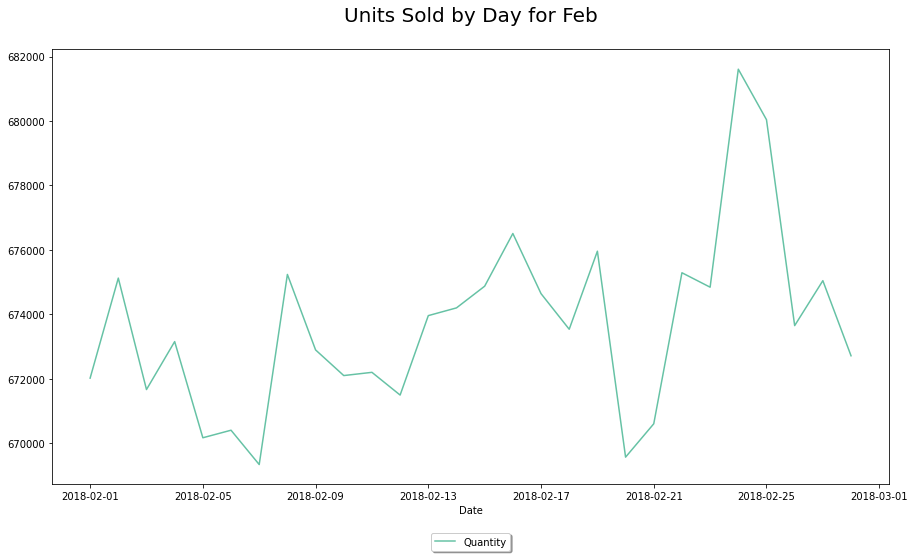

In [0]:
# feb.groupby('Date').agg({'Quantity': 'sum'}).reset_index()
daily_units = feb.groupby('Date', as_index=False).agg({'Quantity': 'sum'})
linechart(daily_units, 'Date', title='Units Sold by Day for Feb')

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [0]:
mar = data[(data['SalesDate'] >= '2018-03-01') & (data['SalesDate'] < '2018-04-01')]

products = mar[mar['ProductID'].isin([124, 344, 407, 449])]
products.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date
31,32,22,47694,124,13,0.2,"0,00",2018-03-04 07:09:32.220,ZOAVW4V6EBSQ71HAT5KZ,2018-03-04
98,99,17,92090,124,24,0.2,"0,00",2018-03-24 15:29:24.980,I78H3546AWIT4D2QS9FG,2018-03-24
232,233,19,62970,407,16,NaN,"0,00",2018-03-01 05:43:52.130,WBUXH9VP5ID73G3LUS5G,2018-03-01
696,697,11,96920,124,25,NaN,"0,00",2018-03-09 23:59:54.780,II54BNTNEAQ1FQ5OO9SG,2018-03-09
1677,1678,7,16978,449,5,NaN,"0,00",2018-03-09 10:01:48.050,QS1H99B00E8QD5CQL4KZ,2018-03-09


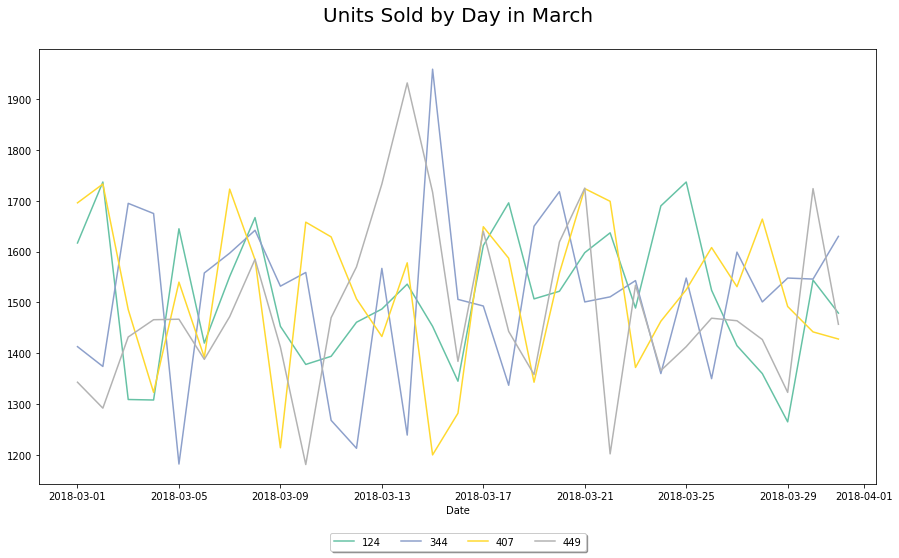

In [0]:
daily_units = products.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')
linechart(daily_units, 'Date', title='Units Sold by Day in March')

### Create a bar chart that shows units sold by each hour of the day.

In [0]:
def barchart(df, x, y, groups=None, length=8, width=14, title=""):
    plt.figure(figsize=(width,length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + "\n", fontsize=16)

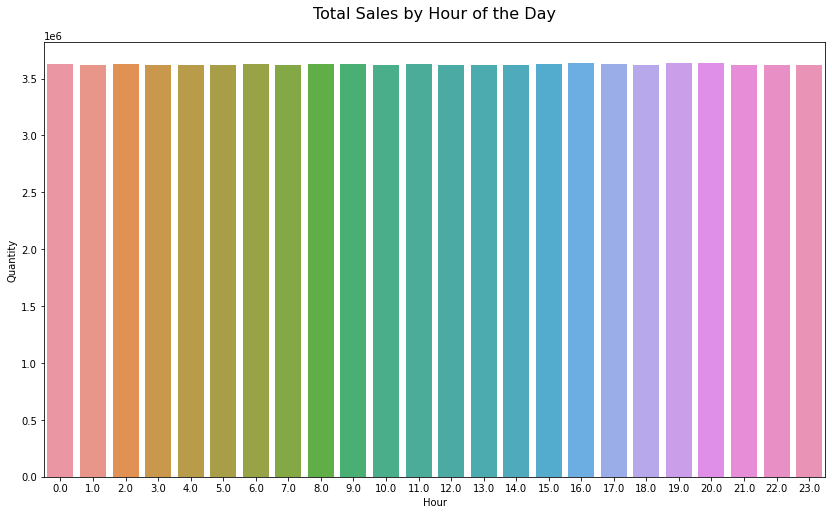

In [0]:
data['Hour'] = data['SalesDate'].dt.hour
hour_sales = data.groupby('Hour').agg({'Quantity': 'sum'}).reset_index()
barchart(hour_sales, 'Hour', 'Quantity', title='Total Sales by Hour of the Day')

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [0]:
def heatmap(df, length=8, width=18, title=""):
    plt.figure(figsize=(width,length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', 
                     cmap='Reds', linewidths=.01)
    
    plt.title(title + "\n", fontsize=16)

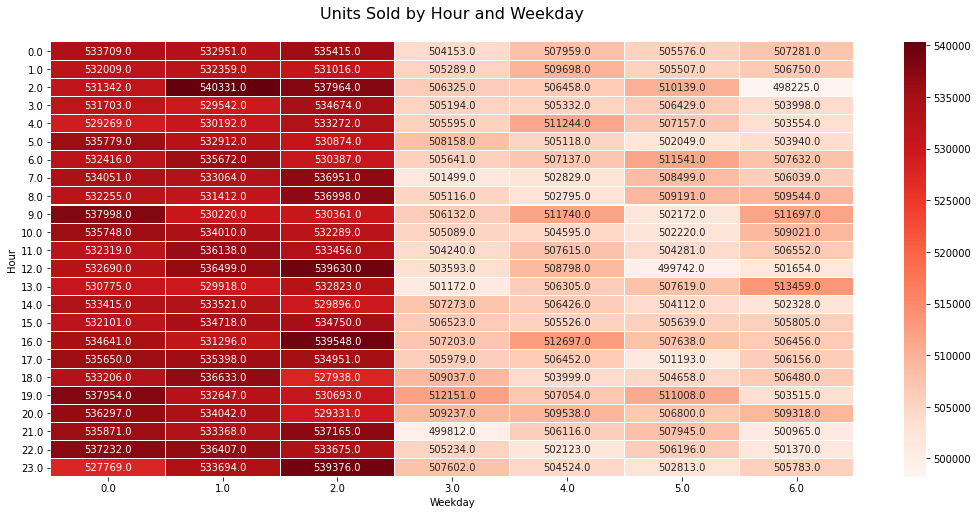

In [0]:
# data['Weekday'] = data['SalesDate'].dt.strftime('%w')
data['Weekday'] = data['SalesDate'].dt.weekday
hour_weekday = data.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='sum')
heatmap(hour_weekday, title='Units Sold by Hour and Weekday')

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [0]:
def correlation_plot(df, title=""):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title + "\n", fontsize=20)

In [0]:
products = list(data['ProductID'].sample(20))

product_data = data[data['ProductID'].isin(products)]
product_data.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Date,Hour,Weekday
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,2018-05-03,19.0,3.0
13,14,7,33133,406,9,NaN,"0,00",2018-02-13 06:39:51.960,VOP9A7Y4C5XSM2LLT0UJ,2018-02-13,6.0,1.0
44,45,5,26337,384,7,NaN,"0,00",2018-02-04 09:37:10.270,IXVL7LCLLS8XC4736CEB,2018-02-04,9.0,6.0
71,72,22,42673,294,11,NaN,"0,00",2018-02-23 04:28:36.320,6CFIUZ0693OALBYQR9RH,2018-02-23,4.0,4.0
74,75,1,27404,62,7,NaN,"0,00",2018-04-14 16:27:40.500,M6SZI5DRNCMKPMYE4384,2018-04-14,16.0,5.0


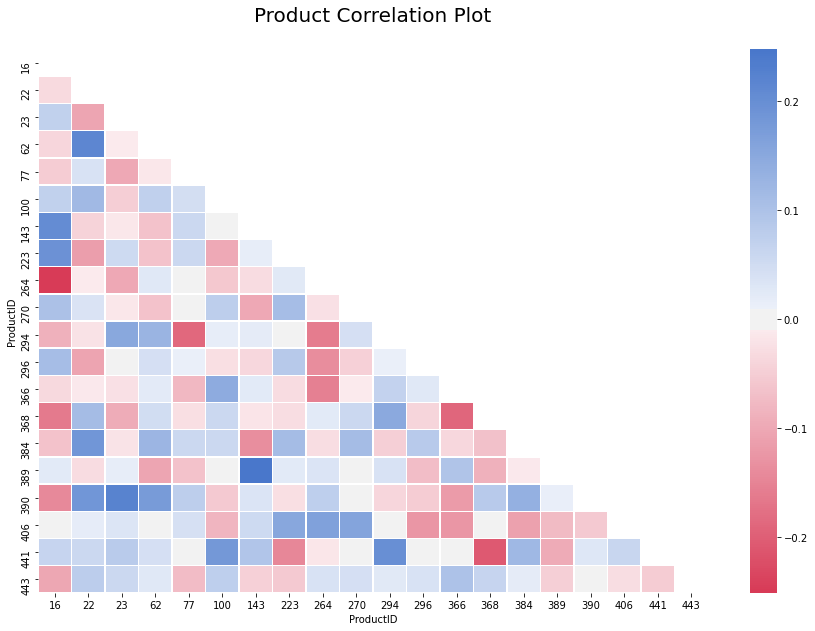

In [0]:
product_daily_sales = product_data.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')
correlation_plot(product_daily_sales, title='Product Correlation Plot')

### Create a histogram showing the distribution of daily units sold.

In [0]:
def histogram(df, field=None, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.distplot(df[field])
    plt.title(title + "\n", fontsize=16)


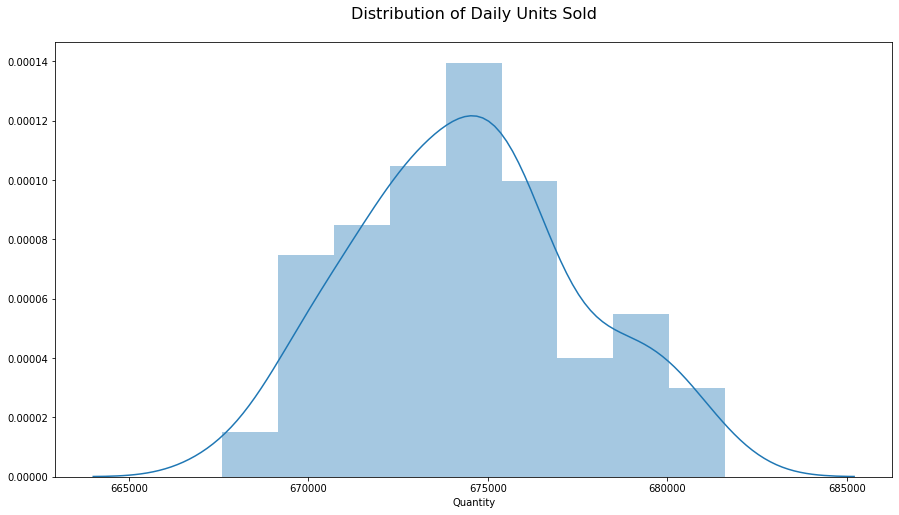

In [0]:
daily_units = data.groupby('Date').agg({'Quantity':'sum'}).reset_index()
histogram(daily_units, 'Quantity', title='Distribution of Daily Units Sold')

### Create a violin plot showing the distribution of daily units sold by month.

In [0]:
def violin(df, x, y, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.violinplot(x=x, y=y, data=df)
    plt.title(title + "\n", fontsize=20)

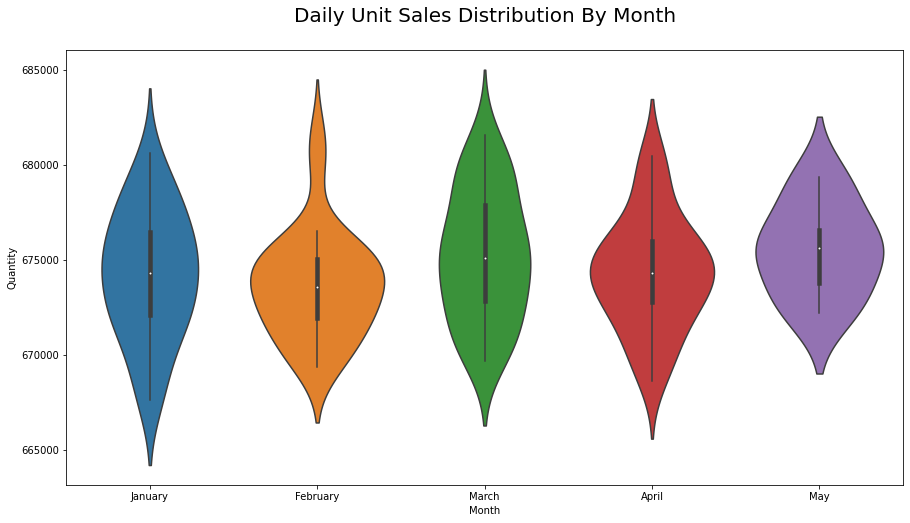

In [0]:
data['Month'] = data['SalesDate'].dt.month_name()

date_month_units = data.groupby(['Date', 'Month']).agg({'Quantity': 'sum'}).reset_index()
violin(date_month_units, 'Month', 'Quantity', title='Daily Unit Sales Distribution By Month')